# ***CNN - Convolutional Neural Networks***

- 100 tane farklı sınıfa ait 32x32 boyutlarında resimlerin olduğu CIFAR-100 veri kümesini kullanarak CNN modeli geliştirin. 
- Modelin doğruluk değerini 0.95'in üzerine çıkarmaya çalışın. Bunun için ***```epoch```, konvolüsyon ve dense katmalarının sayısı, kernel boyutlarını, filtre sayısını, ```padding``` ve ```stride``` değerlerini*** değiştirebilirsiniz.

---
## ***Keras ile CNN modeli olusturma***

Veri kümesini ```from keras.datasets import cifar100``` komutu ile indirecegiz.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# keras model ve katman kutuphaneleri
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import BatchNormalization

# veri artirma kutuphaneleri
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# get_dummies gibi verileri kategorik hale getirme
from keras.utils import to_categorical

# uyarilari gosterme
import warnings
warnings.filterwarnings('ignore')

### ***Egitim ve Test Verisini Belirleme***

In [54]:
# dataseti import edip egitim ve test kumesini belirleyelim
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print("Eğitim kümesi boyutu (X) :", X_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (50000, 32, 32, 3)
Eğitim kümesi boyutu (y) : (50000, 1)
Test kümesi boyutu (X)   : (10000, 32, 32, 3)
Test kümesi boyutu (y)   : (10000, 1)


- Verinin girdi boyutu keras kutuphaneleri icin uygun; 
    - Satir sayisi, genislik(px), yukseklik(px), kanal sayisi(rgb)
- Bu nedenle reshape kullanmaya gerek yok.

### ***Verinin grafiksel gosterimi***

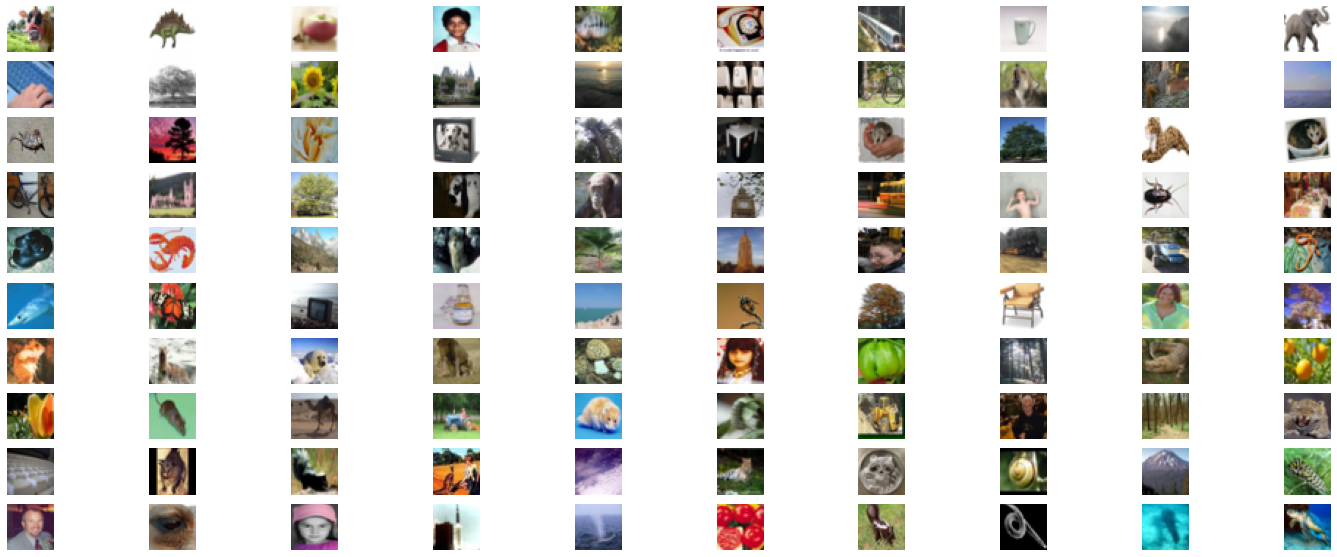

In [55]:
# verilerin bir kismini inceleyelim
plt.figure(figsize=(25,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
           
plt.show()

### ***Hedef Veriyi Kategoriklestirme***

In [56]:
# hedef degisken verisini kategorik hale getirme
# ikinci parametreye sinif sayisi girilir
y_train_kategorik = to_categorical(y_train, 100)
y_test_kategorik = to_categorical(y_test, 100)

### ***Girdi Verisinin Boyutlarini Belirleme***

In [57]:
# verinin satir, sutun ve kanal sayisi
img_satır = X_train.shape[1]
img_sutun = X_train.shape[2]
kanal_sayisi = X_train.shape[3]
print(img_satır, img_sutun, kanal_sayisi)

32 32 3


### ***Model Mimarisini Belirleme***
- Konvolusyon katmani tanimlarken;
    -  ```filters``` ile cikti sayisi, 
    - ```kernel_size``` ile konvolusyon pencere boyutu,
    - ```strides``` ile adim boyutu,
    - ```padding``` degeri  degistirilebilir.
- Yogun katman tanimlarken; 
    - noron sayisi,
    - aktivasyon fonksiyonu degistirilebilir.
- Katman sayilari artirilabilir.

In [70]:
# model tanimlama
cnn_model = Sequential()
# modele katman ekleme, konvolusyon katmani
# filters ile cikti sayisi, kernel_size ile konvolusyon pencere boyutu
# strides ile adim boyutunu belirleriz
cnn_model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (1,1), padding='valid',
               input_shape=(img_satır, img_sutun,kanal_sayisi)))
cnn_model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (1,1), padding='valid',
               input_shape=(img_satır, img_sutun,kanal_sayisi)))
cnn_model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (1,1), padding='valid',
               input_shape=(img_satır, img_sutun,kanal_sayisi)))
# batch normalizasyon katmani
# aradaki katmanların çıktılarının ortalaması 0, ve standart sapması 1 olacak şekilde normalize edelim
cnn_model.add(BatchNormalization())
# matris seklindeki resim verilerini duz dizi haline getirme
cnn_model.add(Flatten())
# yogun katman ekleme
cnn_model.add(Dense(32, activation='relu', name = "Yogun_Katman_1"))
# yogun katman ekleme
cnn_model.add(Dense(32, activation='relu', name = "Yogun_Katman_2"))
# yogun katman ekleme
cnn_model.add(Dense(32, activation='relu', name = "Yogun_Katman_3"))
# modele katman ekleme, son yogun katman, buradaki noron sayisi sinif sayisi olmali
cnn_model.add(Dense(100, activation='softmax'))
# model ozeti  
cnn_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 64)        102464    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 20, 20, 64)        102464    
_________________________________________________________________
batch_normalization_19 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
flatten_19 (Flatten)         (None, 25600)             0         
_________________________________________________________________
Yogun_Katman_1 (Dense)       (None, 32)                819232    
_________________________________________________________________
Yogun_Katman_2 (Dense)       (None, 32)              

### ***Modeli Derleme ve Fit Etme***

In [71]:
# modeli derleme
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# modeli fit etme, 
# validation_split ile validasyon icin ayrilacak kumenin yuzdesi belirlenir
# batch_size her bir iterasyonda ne kadar veri kullanilacagini belirler, default degeri 32 dir, 
# epoch iterasyon sayisini belirler
cnn_model.fit(X_train, y_train_kategorik, validation_split=0.2, epochs=20, batch_size=64, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 561s - loss: 4.3532 - accuracy: 0.0452 - val_loss: 4.5094 - val_accuracy: 0.0580
Epoch 2/20
 - 461s - loss: 3.9814 - accuracy: 0.0843 - val_loss: 4.1434 - val_accuracy: 0.0713
Epoch 3/20
 - 472s - loss: 3.8200 - accuracy: 0.1119 - val_loss: 3.8477 - val_accuracy: 0.1125
Epoch 4/20
 - 487s - loss: 3.6950 - accuracy: 0.1321 - val_loss: 3.7547 - val_accuracy: 0.1293
Epoch 5/20
 - 509s - loss: 3.5891 - accuracy: 0.1498 - val_loss: 3.6584 - val_accuracy: 0.1372
Epoch 6/20
 - 475s - loss: 3.4886 - accuracy: 0.1668 - val_loss: 3.5612 - val_accuracy: 0.1542
Epoch 7/20
 - 430s - loss: 3.4020 - accuracy: 0.1785 - val_loss: 3.4961 - val_accuracy: 0.1703
Epoch 8/20
 - 382s - loss: 3.3254 - accuracy: 0.1914 - val_loss: 3.4788 - val_accuracy: 0.1723
Epoch 9/20
 - 333s - loss: 3.2449 - accuracy: 0.2050 - val_loss: 3.4424 - val_accuracy: 0.1811
Epoch 10/20
 - 260s - loss: 3.1823 - accuracy: 0.2178 - val_loss: 3.3344 - val_accuracy: 0.1994

### ***Modelin Degerlendirmesi***

In [72]:
accu_train = cnn_model.evaluate(X_train, y_train_kategorik)[1]
accu_test = cnn_model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(accu_train))
print("Test kümesi doğruluk değeri   : {:.3f}".format(accu_test))

10000/10000 [==============================] - 13s 1ms/step

Eğitim kümesi doğruluk değeri : 0.320
Test kümesi doğruluk değeri   : 0.244


- Yapilan degisikliklere ragmen modelimizin dogruluk degerini artiramadik.

---
## ***Modeli Gelistirme***
- ```epoch``` ile iterasyon sayisi degistirilebilir.
- ```batch_size``` ile algoritmanin her iterasyonda ne kadar veri kullanacagini belirleriz. Ayrintilar icin [stackoverflow](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network) u inceleyin.
- Katman sayilari ve turleri degistirilebilir.
- Konvolusyon katmani tanimlarken;
    -  ```filters``` ile cikti sayisi, 
    - ```kernel_size``` ile konvolusyon pencere boyutu,
    - ```strides``` ile adim boyutu,
    - ```padding``` degeri  degistirilebilir.
- Yogun katman tanimlarken; 
    - noron sayisi,
    - aktivasyon fonksiyonu degistirilebilir.

    
## ***Dikkat Edilecek Konular***
- Katman sayısı ve her katmandaki nöronların sayısı (yani model mimarisi) belirlenecek hiperparametrelerdir. Bu sayılarla ilgili tek bir altın kural yoktur ve bu sayılar için en iyi değerler yapılacak işe bağlıdır.
- Model ne kadar derin olursa, karmaşık etkileşimler olusur ve model, gösterimi o kadar iyi bulur, iyi fit eder.
- Katman sayısının artırılması bir dereceye kadar ***model performans***ını artırsa da, modelin mimarisi cok karmasik yapildiginda belli bir noktadan sonra ***genelleştirme problemi*** ortaya çıkabilir. Bu da overfitting e neden olur.
- Katmanın arttırılması (modelin karmasiklastirilmasi) tahmin edilecek parametrelerin sayısını da arttırır, dolayısıyla ***hesaplama süresi*** de artar.
- Tahmin etmek için ***ne kadar çok parametre*** varsa, modelimizi geliştirmek için de ***o kadar çok veri***ye ihtiyacımız olacaktır.